In [49]:
import os
import sys
from pathlib import Path
# Setting the working directory to the root of the project
project_dir = Path("C:/Users/adbou/source/repos/KFHXRelatedAi/")
os.chdir(project_dir)

from Configs.GeneralPaths import SOURCEDATA
import pandas as pd
import numpy as np

In [50]:
#load user transactions data
reward_transactions = pd.read_excel(Path(SOURCEDATA / "TAM_Cleaned_Deals.xlsx"))
reward_transactions.head()
reward_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413444 entries, 0 to 413443
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   EntityId                   413444 non-null  int64         
 1   EntityName                 413444 non-null  object        
 2   TrxId                      413444 non-null  int64         
 3   TrxDate                    413444 non-null  datetime64[ns]
 4   Acronym                    413444 non-null  object        
 5   MerchantName               413444 non-null  object        
 6   Currency                   413444 non-null  object        
 7   FK_BusinessUserId          413444 non-null  int64         
 8   PointsRewarded             413444 non-null  int64         
 9   FK_TierId                  413444 non-null  int64         
 10  Tier                       413444 non-null  object        
 11  Location                   413444 non-null  object  

In [51]:
reward_transactions.head()

,EntityId,EntityName,TrxId,TrxDate,Acronym,MerchantName,Currency,FK_BusinessUserId,PointsRewarded,FK_TierId,Tier,Location,TotalPaid,MCC,MCC Details,MCC General Category,MCC More General Category,Month,Season,Detailed MCC
0,1594,Dose Café,18084252,2024-01-11 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,150,1845,Solo,KW,1.50,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
1,1594,Dose Café,18137458,2024-01-13 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,125,1845,Solo,KW,1.25,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
2,1594,Dose Café,18240199,2024-01-17 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,200,1845,Solo,KW,2.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
3,1594,Dose Café,18240223,2024-01-17 03:00:00,DOSE ZAHRA KUWAIT KW,DOSE ZAHRA,KWD,1001269,300,1846,Hero,KW,3.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
4,1586,Caffeine Cafe,18243367,2024-01-18 03:00:00,CAFFEINE CAFE KUWAIT KW,CAFFEINE CAFE,KWD,1011645,200,1846,Hero,KW,2.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services


In [52]:
nan_counts = reward_transactions.isnull().sum()
print(nan_counts)

EntityId                     0
EntityName                   0
TrxId                        0
TrxDate                      0
Acronym                      0
MerchantName                 0
Currency                     0
FK_BusinessUserId            0
PointsRewarded               0
FK_TierId                    0
Tier                         0
Location                     0
TotalPaid                    0
MCC                          0
MCC Details                  0
MCC General Category         0
MCC More General Category    0
Month                        0
Season                       0
Detailed MCC                 0
dtype: int64


count    17828.000000
mean        23.190711
std         57.025424
min          1.000000
25%          2.000000
50%          6.000000
75%         15.000000
max        880.000000
Name: count, dtype: float64


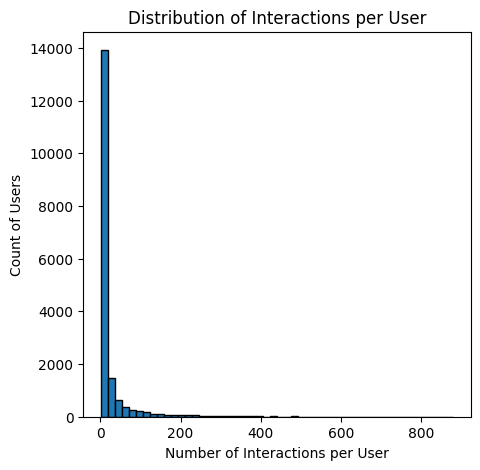

In [53]:
# Count the number of interactions per user
user_interaction_counts = reward_transactions['FK_BusinessUserId'].value_counts()

# Summary statistics
print(user_interaction_counts.describe())

# Plot the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.hist(user_interaction_counts, bins=50, edgecolor='k')
plt.xlabel('Number of Interactions per User')
plt.ylabel('Count of Users')
plt.title('Distribution of Interactions per User')
plt.show()

User Interactions Observations:

The distribution is highly right-skewed, with a long tail extending towards users with a higher number of interactions.
There are very few users with an extremely high number of interactions 

Summary Statistics:
-Count: There are 17,828 users in the dataset.
-Mean (Average): The average number of interactions per user is approximately 23.19.
-Median (50%): The median number of interactions per user is 6. This indicates that 50% of the users have 6 or fewer interactions
-Min: The minimum number of interactions per user is 1.
-Max: The maximum number of interactions by any user is 880, highlighting the presence of outliers with exceptionally high interaction counts.

Key Observations:
-Skewness: The data is highly skewed to the right, meaning most users have relatively few interactions, but a small number of users have a very high number of interactions.
-Outliers: The presence of users with significantly higher interactions (up to 880) suggests the need for further investigation. These outliers might represent highly engaged users or potentially abnormal behavior.
-Central Tendency: The median (6 interactions) being much lower than the mean (23.19 interactions) further illustrates the skewness in the data.

Potential Actions:
-Segmentation: We can Consider segmenting users based on interaction levels to tailor strategies for different engagement levels.
-Outlier Analysis: We can Investigate users with exceptionally high interactions to understand their behavior or identify any anomalies.




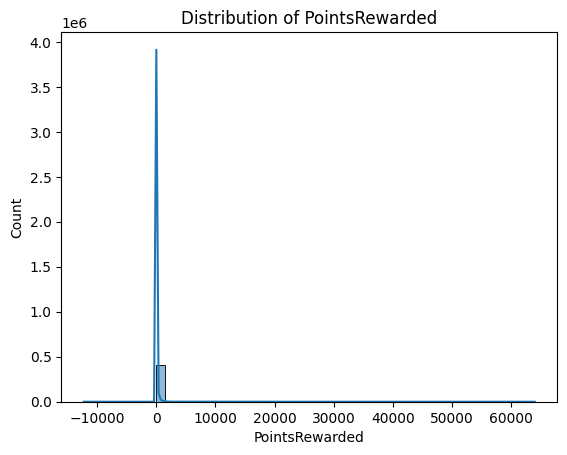

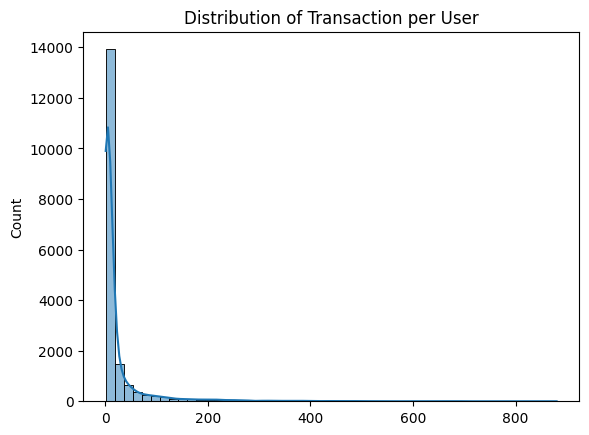

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of PointsRedeemed
sns.histplot(reward_transactions['PointsRewarded'], bins=50, kde=True)
plt.title('Distribution of PointsRewarded')
plt.show()

# Visualizing the distribution of transactions per user
user_redemptions = reward_transactions.groupby('FK_BusinessUserId').size()
sns.histplot(user_redemptions, bins=50, kde=True)
plt.title('Distribution of Transaction per User')
plt.show()

# # Visualizing the distribution of redemptions per item
# item_redemptions = reward_transactions.groupby('FK_ContentId').size()
# sns.histplot(item_redemptions, bins=50, kde=True)
# plt.title('Distribution of Transaction per Item')
# plt.show()


Summary Observation Of Points Rewarded Distribution:

-The majority of data points are clustered around 0, with a very high spike at the lower end of the distribution.

-There is a noticeable right-skewness, with a long tail extending towards higher values of points rewarded.

-The presence of negative values suggests that some transactions might involve the deduction of points or data entry errors.

Key Observations:

-Skewness: The distribution is highly skewed to the right, indicating that most users receive a small number of points, but a few users receive a significantly larger number of points.

-Outliers: The long tail and the spread of data points up to 60,000 indicate the presence of outliers with exceptionally high points rewarded.

-Negative Values: The existence of negative values indicated that there are deduction and cancellation of transactions.

In [55]:
unique_locations = reward_transactions["Location"].unique()
unique_locations

array(['KW', 'QA', 'SA', 'HK', 'AE', 'SG', 'US', 'CN', 'BH', 'GB', 'CY',
       'KZ', 'IE', 'NL', 'IT', 'ES', 'SE', 'LT', 'OM', 'LU', 'TR', 'DE',
       'FR', 'LB', 'PH', 'GI', 'DK', 'PT', 'CH', 'EG', 'MO', 'LK', 'PK',
       'CA', 'NG', 'TH', 'GR', 'MY', 'MT', 'JO', 'AU', 'IN', 'LV', 'KE',
       'AT', 'PR', 'IQ', 'PL', 'NZ', 'ET', 'HU', 'KR', 'AZ', 'NO', 'BE',
       'BG', 'EE', 'JP', 'CZ', 'AD', 'GH', 'MA', 'BR', 'GE', 'BA', 'AM',
       'SM', 'FI', 'UZ', 'MX', 'ZM', 'ID', 'GP', 'IS', 'CL', 'AL', 'RO',
       'RS'], dtype=object)

In [56]:
unique_curency = reward_transactions["Currency"].unique()
unique_curency

array(['KWD'], dtype=object)

In [57]:
unique_tiers = reward_transactions["Tier"].unique()
unique_tiers

array(['Solo', 'Hero', 'Super Hero', 'Youth Sales', 'Students'],
      dtype=object)

In [58]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [59]:
transactions_for_algo = reward_transactions

In [60]:
transactions_for_algo.head()

,EntityId,EntityName,TrxId,TrxDate,Acronym,MerchantName,Currency,FK_BusinessUserId,PointsRewarded,FK_TierId,Tier,Location,TotalPaid,MCC,MCC Details,MCC General Category,MCC More General Category,Month,Season,Detailed MCC
0,1594,Dose Café,18084252,2024-01-11 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,150,1845,Solo,KW,1.50,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
1,1594,Dose Café,18137458,2024-01-13 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,125,1845,Solo,KW,1.25,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
2,1594,Dose Café,18240199,2024-01-17 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,200,1845,Solo,KW,2.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
3,1594,Dose Café,18240223,2024-01-17 03:00:00,DOSE ZAHRA KUWAIT KW,DOSE ZAHRA,KWD,1001269,300,1846,Hero,KW,3.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
4,1586,Caffeine Cafe,18243367,2024-01-18 03:00:00,CAFFEINE CAFE KUWAIT KW,CAFFEINE CAFE,KWD,1011645,200,1846,Hero,KW,2.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services


In [61]:
# Basic summary statistics for the entire dataset
print(reward_transactions.describe())

# Summary statistics by EntityName
print(reward_transactions.groupby('EntityName').describe())

print(reward_transactions.groupby('Tier').describe())

            EntityId         TrxId                        TrxDate  \
count  413444.000000  4.134440e+05                         413444   
mean     1456.074835  2.192177e+07  2024-04-18 09:33:15.096795904   
min      1455.000000  1.781918e+07            2024-01-01 03:00:00   
25%      1455.000000  1.975922e+07            2024-03-05 03:00:00   
50%      1455.000000  2.195757e+07            2024-04-24 03:00:00   
75%      1455.000000  2.401116e+07            2024-06-03 03:00:00   
max      1808.000000  2.576935e+07            2024-07-07 03:00:00   
std        14.667539  2.376288e+06                            NaN   

       FK_BusinessUserId  PointsRewarded      FK_TierId      TotalPaid  \
count       4.134440e+05   413444.000000  413444.000000  413444.000000   
mean        1.021333e+06      104.098187    1846.317501       9.106182   
min         9.764810e+05   -12260.000000    1845.000000   -1226.000000   
25%         9.960360e+05       16.000000    1845.000000       1.500000   
50%     

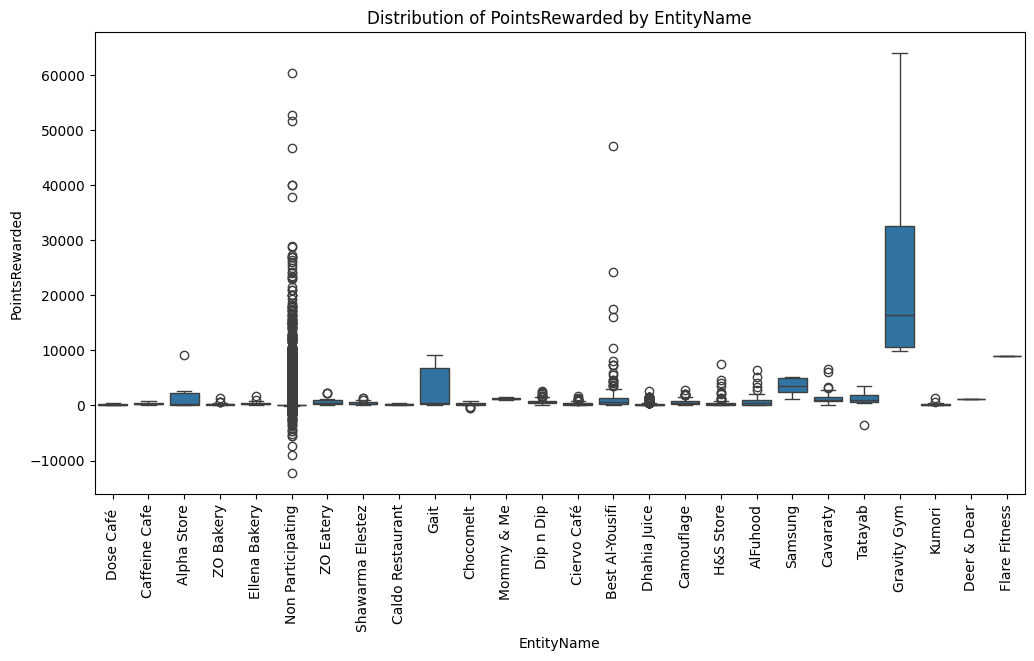

In [62]:
# Distribution of PointsRewarded by EntityName
plt.figure(figsize=(12, 6))
sns.boxplot(x='EntityName', y='PointsRewarded', data=reward_transactions)
plt.xticks(rotation=90)
plt.title('Distribution of PointsRewarded by EntityName')
plt.show()

Observation:

The majority of entities have points rewarded clustered around lower values.

Outliers are visible, particularly in entities like 'Participating', 'Gait', and 'Tatayyab', indicating transactions with very high points rewarded.

Some entities have negative points rewarded, which could be due to point deductions.

Entities in 'Non Participating' show a wide range of points rewarded, indicating variability in how points are distributed among transactions.


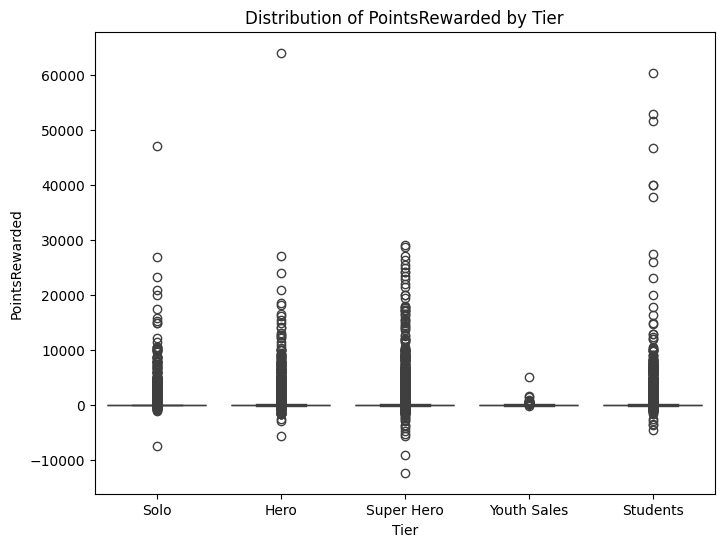

In [63]:
# Distribution of PointsRewarded by Tier
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tier', y='PointsRewarded', data=reward_transactions)
plt.title('Distribution of PointsRewarded by Tier')
plt.show()

Observation:

All tiers have a majority of points rewarded clustered around lower values.

There are significant outliers in each tier, particularly in 'Super Hero' and 'Students', indicating transactions with very high points rewarded.

Negative values are present across tiers, indicating point deductions.

The distribution appears similar across tiers, suggesting that the tier might not be a strong differentiator in the amount of points rewarded.

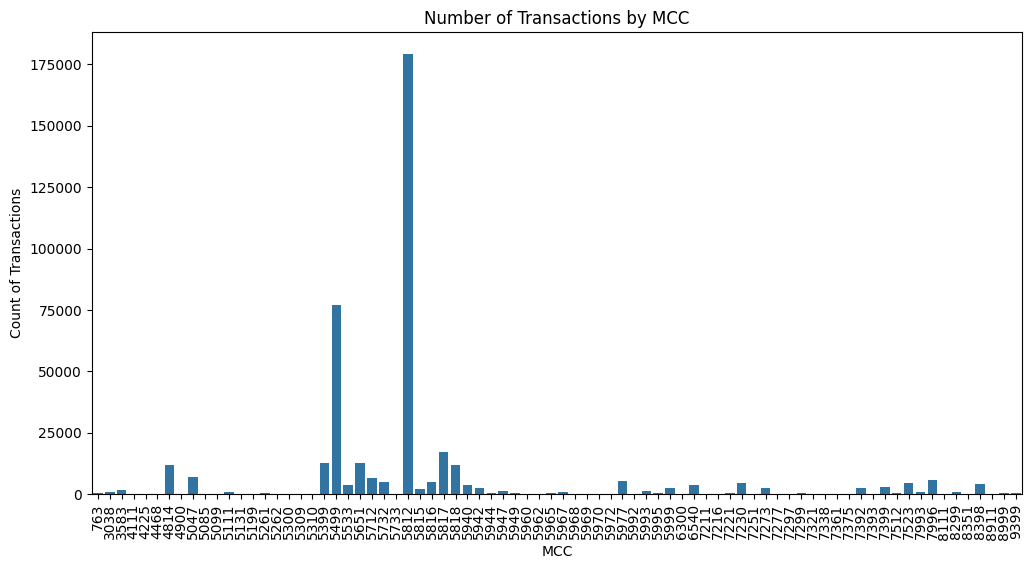

In [64]:
# Transactions by MCC
plt.figure(figsize=(12, 6))
mcc_counts = reward_transactions['MCC'].value_counts()
sns.barplot(x=mcc_counts.index, y=mcc_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Transactions by MCC')
plt.xlabel('MCC')
plt.ylabel('Count of Transactions')
plt.show()

Observation:

Certain MCCs dominate the transaction counts, with some categories having significantly higher transactions than others.(MCC : 5812 Food Restaurants)

The distribution is highly skewed, with a few MCCs having a disproportionately high number of transactions.

This skewness indicates that a few categories are particularly popular or frequently used by users.


Investigating Outliers


In [65]:
Q1 = reward_transactions['PointsRewarded'].quantile(0.25)
Q3 = reward_transactions['PointsRewarded'].quantile(0.75)
IQR = Q3 - Q1

In [66]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [67]:
outliers = reward_transactions[(reward_transactions['PointsRewarded'] < lower_bound) | (reward_transactions['PointsRewarded'] > upper_bound)]
outliers

,EntityId,EntityName,TrxId,TrxDate,Acronym,MerchantName,Currency,FK_BusinessUserId,PointsRewarded,FK_TierId,Tier,Location,TotalPaid,MCC,MCC Details,MCC General Category,MCC More General Category,Month,Season,Detailed MCC
2,1594,Dose Café,18240199,2024-01-17 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,200,1845,Solo,KW,2.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
3,1594,Dose Café,18240223,2024-01-17 03:00:00,DOSE ZAHRA KUWAIT KW,DOSE ZAHRA,KWD,1001269,300,1846,Hero,KW,3.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
4,1586,Caffeine Cafe,18243367,2024-01-18 03:00:00,CAFFEINE CAFE KUWAIT KW,CAFFEINE CAFE,KWD,1011645,200,1846,Hero,KW,2.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
6,1586,Caffeine Cafe,18414067,2024-01-25 03:00:00,CAFFEINE CAFE KUWAIT KW,CAFFEINE CAFE,KWD,1010935,525,1846,Hero,KW,5.25,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
7,1586,Caffeine Cafe,18414187,2024-01-25 03:00:00,CAFFEINE CAFE KUWAIT KW,CAFFEINE CAFE,KWD,992423,490,1846,Hero,KW,4.90,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413417,1455,Non Participating,25769323,2024-07-07 03:00:00,nutwell Tallinn EE,nutwell,KWD,1052351,193,1848,Students,EE,9.69,5499,Misc. Food Stores – Convenience Stores and Spe...,Miscellaneous Food Stores - Convenience Stores...,Restaurants and Food Services,7,Summer,Food and Beverage Stores
413422,1455,Non Participating,25769328,2024-07-07 03:00:00,ARCHIES - LEEDS LEEDS GB,ARCHIES - LEEDS,KWD,991162,215,1848,Students,GB,10.76,5812,Fast Food Restaurants,Fast Food Restaurants,Restaurants and Food Services,7,Summer,Restaurants and Food Services
413429,1455,Non Participating,25769335,2024-07-07 03:00:00,aliexpress Luxembourg LU,aliexpress,KWD,1116352,196,1845,Solo,LU,19.69,5399,Department Stores,Department Stores,Retail Stores,7,Summer,Retail Stores
413435,1455,Non Participating,25769341,2024-07-07 03:00:00,ZONE BOWLING FOREST HILL AU,ZONE BOWLING,KWD,1032423,256,1845,Solo,AU,25.62,7996,Bowling Alleys,Bowling Alleys,Entertainment and Recreation,7,Summer,Entertainment


In [68]:
# Remove outliers from the dataset
cleaned_data = reward_transactions[(reward_transactions['PointsRewarded'] >= lower_bound) & (reward_transactions['PointsRewarded'] <= upper_bound)]


In [69]:
# Cap outlier values
capped_data = reward_transactions.copy()
capped_data['PointsRewarded'] = capped_data['PointsRewarded'].clip(lower=lower_bound, upper=upper_bound)


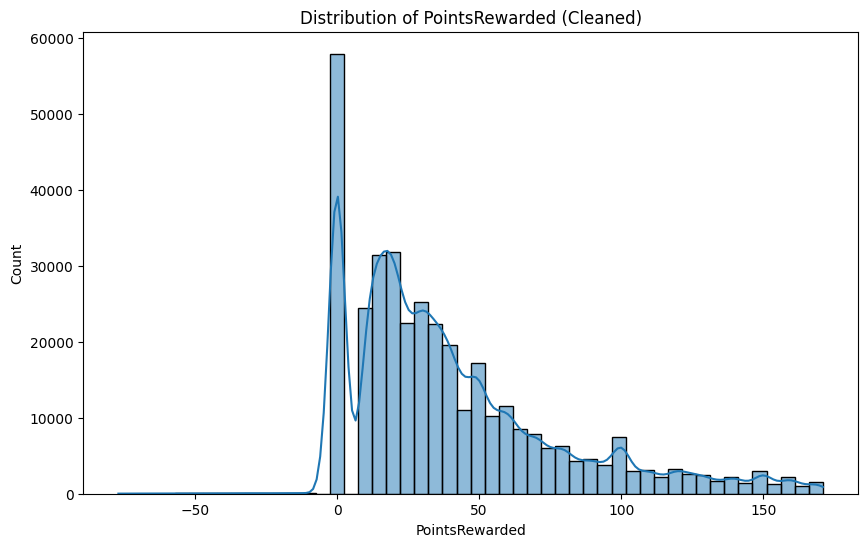

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of cleaned data
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['PointsRewarded'], bins=50, kde=True)
plt.title('Distribution of PointsRewarded (Cleaned)')
plt.show()


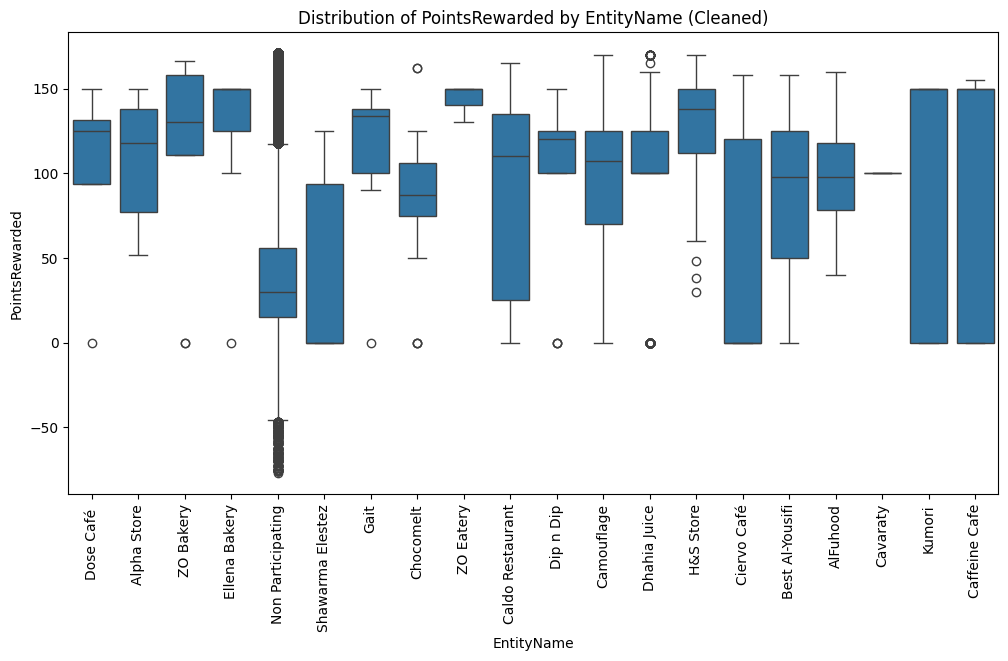

In [71]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='EntityName', y='PointsRewarded', data=cleaned_data)
plt.xticks(rotation=90)
plt.title('Distribution of PointsRewarded by EntityName (Cleaned)')
plt.show()

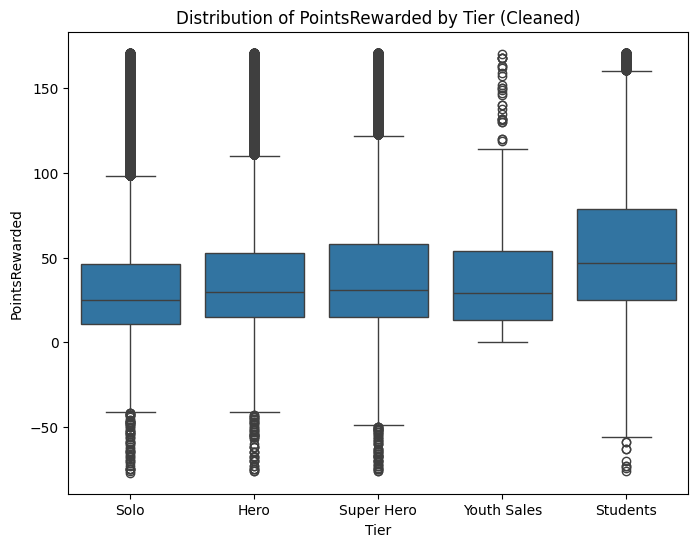

In [72]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tier', y='PointsRewarded', data=cleaned_data)
plt.title('Distribution of PointsRewarded by Tier (Cleaned)')
plt.show()

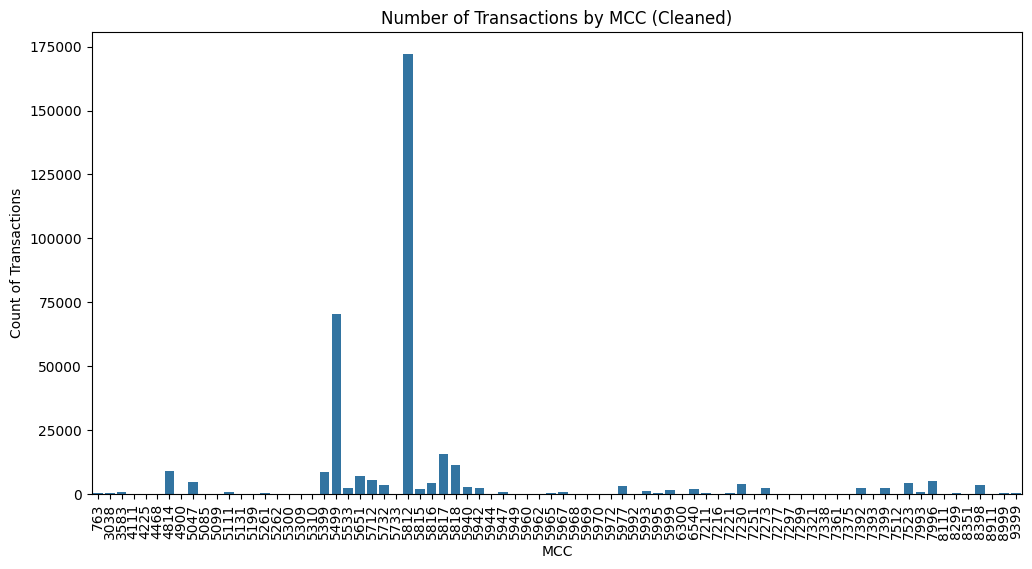

In [73]:
plt.figure(figsize=(12, 6))
mcc_counts = cleaned_data['MCC'].value_counts()
sns.barplot(x=mcc_counts.index, y=mcc_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Transactions by MCC (Cleaned)')
plt.xlabel('MCC')
plt.ylabel('Count of Transactions')
plt.show()

In [74]:
cleaned_data.head()

,EntityId,EntityName,TrxId,TrxDate,Acronym,MerchantName,Currency,FK_BusinessUserId,PointsRewarded,FK_TierId,Tier,Location,TotalPaid,MCC,MCC Details,MCC General Category,MCC More General Category,Month,Season,Detailed MCC
0,1594,Dose Café,18084252,2024-01-11 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,150,1845,Solo,KW,1.50,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
1,1594,Dose Café,18137458,2024-01-13 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,125,1845,Solo,KW,1.25,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
5,1594,Dose Café,18243795,2024-01-18 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,125,1845,Solo,KW,1.25,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
10,1656,Alpha Store,17819329,2024-01-01 03:00:00,ALNAHAR TECH COMPANY/A SHARQ KWT,ALNAHAR TECH COMPANY/A SHARQ,KWD,997483,77,1846,Hero,KW,3.89,5732,Electronic Sales,Electronics Stores,Retail Stores,1,Winter,Electronics and Appliances
11,1792,ZO Bakery,17820605,2024-01-02 03:00:00,ZO BAKERY WAIT KW,ZO BAKERY,KWD,1011087,166,1846,Hero,KW,1.66,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services


NCF Test BIN 1

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


# Encode user IDs and MCCs
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

cleaned_data['user'] = user_encoder.fit_transform(cleaned_data['FK_BusinessUserId'])
cleaned_data['item'] = item_encoder.fit_transform(cleaned_data['MCC'])

# Aggregate the data to count interactions for each user-MCC pair
interaction_counts = cleaned_data.groupby(['user', 'item']).size().reset_index(name='interaction')

# Scale the interaction counts
scaler = MinMaxScaler()
interaction_counts['interaction_scaled'] = scaler.fit_transform(interaction_counts[['interaction']])

C:\Users\adbou\AppData\Local\Temp\ipykernel_10760\1899225560.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['user'] = user_encoder.fit_transform(cleaned_data['FK_BusinessUserId'])
C:\Users\adbou\AppData\Local\Temp\ipykernel_10760\1899225560.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['item'] = item_encoder.fit_transform(cleaned_data['MCC'])


In [76]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Input, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Number of unique users and items after encoding
num_users = interaction_counts['user'].nunique()
num_items = interaction_counts['item'].nunique()

# Hyperparameters
embedding_size = 50
dense_units = [64, 32]
dropout_rate = 0.3
initial_learning_rate = 0.001
regularization_factor = 1e-5

# Model layers
user_input = Input(shape=(1,), name='user_input')
item_input = Input(shape=(1,), name='item_input')

user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size, name='user_embedding',
                           embeddings_regularizer=l2(regularization_factor))(user_input)
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_size, name='item_embedding',
                           embeddings_regularizer=l2(regularization_factor))(item_input)

user_flatten = Flatten()(user_embedding)
item_flatten = Flatten()(item_embedding)

concat = Concatenate()([user_flatten, item_flatten])

dense_1 = Dense(dense_units[0], activation='relu', kernel_regularizer=l2(regularization_factor))(concat)
dropout_1 = Dropout(dropout_rate)(dense_1)
dense_2 = Dense(dense_units[1], activation='relu', kernel_regularizer=l2(regularization_factor))(dropout_1)
dropout_2 = Dropout(dropout_rate)(dense_2)
output = Dense(1, activation='linear')(dropout_2)

model = Model(inputs=[user_input, item_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=initial_learning_rate), loss='mean_squared_error', metrics=['mse'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 50)     │    873,150 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_embedding      │ (None, 1, 50)     │      3,900 │ item_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 50)        │          0 │ user_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 50)        │          0 │ item_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 100)       │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      6,464 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32)        │      2,080 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32)        │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         33 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 885,627 (3.38 MB)

 Trainable params: 885,627 (3.38 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
from sklearn.model_selection import train_test_split

# Train/test split
train, test = train_test_split(interaction_counts, test_size=0.2, random_state=42)

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: initial_learning_rate * (0.5 ** (epoch // 10)))

# Training the model
history = model.fit(
    [train['user'], train['item']],
    train['interaction_scaled'],
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, lr_schedule]
)


Epoch 1/30
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0024 - mse: 8.6104e-04 - val_loss: 9.4612e-04 - val_mse: 9.0234e-04 - learning_rate: 0.0010
Epoch 2/30
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 8.5538e-04 - mse: 8.1252e-04 - val_loss: 9.4256e-04 - val_mse: 9.1131e-04 - learning_rate: 0.0010
Epoch 3/30
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 7.4521e-04 - mse: 7.1086e-04 - val_loss: 9.4994e-04 - val_mse: 9.1536e-04 - learning_rate: 0.0010
Epoch 4/30
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 8.9972e-04 - mse: 8.4050e-04 - val_loss: 9.7504e-04 - val_mse: 9.2065e-04 - learning_rate: 0.0010
Epoch 5/30
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 8.1432e-04 - mse: 7.0310e-04 - val_loss: 0.0011 - val_mse: 8.6947e-04 - learning_rate: 0.0010


In [78]:
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity

# Extract item (MCC) embeddings
item_embedding_layer = model.get_layer('item_embedding')
item_embeddings = item_embedding_layer.get_weights()[0]

# Normalize the embeddings
item_embeddings_normalized = normalize(item_embeddings, axis=1)

# Function to find similar MCCs
def find_similar_mcc(mcc_id, item_embeddings, item_encoder, top_n=5):
    # Encode the given MCC
    mcc_idx = item_encoder.transform([mcc_id])[0]
    # Compute cosine similarity between the given MCC and all other MCCs
    similarity_scores = cosine_similarity([item_embeddings[mcc_idx]], item_embeddings)[0]
    # Get the indices of the most similar MCCs
    similar_indices = similarity_scores.argsort()[::-1][1:top_n+1]
    # Decode the indices back to MCC IDs
    similar_mcc_ids = item_encoder.inverse_transform(similar_indices)
    return similar_mcc_ids

# Example: Find similar MCCs for a specific MCC
mcc_id = 4111   # Example MCC
similar_mccs = find_similar_mcc(mcc_id, item_embeddings_normalized, item_encoder)
print("Similar MCCs to {}: {}".format(mcc_id, similar_mccs))


Similar MCCs to 4111: [7211 5816 4468 6300 8398]


Implicit ALS

In [79]:
reward_transactions.head()

,EntityId,EntityName,TrxId,TrxDate,Acronym,MerchantName,Currency,FK_BusinessUserId,PointsRewarded,FK_TierId,Tier,Location,TotalPaid,MCC,MCC Details,MCC General Category,MCC More General Category,Month,Season,Detailed MCC
0,1594,Dose Café,18084252,2024-01-11 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,150,1845,Solo,KW,1.50,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
1,1594,Dose Café,18137458,2024-01-13 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,125,1845,Solo,KW,1.25,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
2,1594,Dose Café,18240199,2024-01-17 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,200,1845,Solo,KW,2.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
3,1594,Dose Café,18240223,2024-01-17 03:00:00,DOSE ZAHRA KUWAIT KW,DOSE ZAHRA,KWD,1001269,300,1846,Hero,KW,3.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services
4,1586,Caffeine Cafe,18243367,2024-01-18 03:00:00,CAFFEINE CAFE KUWAIT KW,CAFFEINE CAFE,KWD,1011645,200,1846,Hero,KW,2.00,5812,Eating places and Restaurants,"Eating Places, Restaurants",Restaurants and Food Services,1,Winter,Restaurants and Food Services


In [80]:
updated_reward_transactions = reward_transactions.drop(columns=["MCC Details","MCC General Category"])

In [81]:
updated_reward_transactions.head()

,EntityId,EntityName,TrxId,TrxDate,Acronym,MerchantName,Currency,FK_BusinessUserId,PointsRewarded,FK_TierId,Tier,Location,TotalPaid,MCC,MCC More General Category,Month,Season,Detailed MCC
0,1594,Dose Café,18084252,2024-01-11 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,150,1845,Solo,KW,1.50,5812,Restaurants and Food Services,1,Winter,Restaurants and Food Services
1,1594,Dose Café,18137458,2024-01-13 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,125,1845,Solo,KW,1.25,5812,Restaurants and Food Services,1,Winter,Restaurants and Food Services
2,1594,Dose Café,18240199,2024-01-17 03:00:00,JUREAT AL SAADA CO KUWAIT KW,JUREAT AL SAADA CO,KWD,996464,200,1845,Solo,KW,2.00,5812,Restaurants and Food Services,1,Winter,Restaurants and Food Services
3,1594,Dose Café,18240223,2024-01-17 03:00:00,DOSE ZAHRA KUWAIT KW,DOSE ZAHRA,KWD,1001269,300,1846,Hero,KW,3.00,5812,Restaurants and Food Services,1,Winter,Restaurants and Food Services
4,1586,Caffeine Cafe,18243367,2024-01-18 03:00:00,CAFFEINE CAFE KUWAIT KW,CAFFEINE CAFE,KWD,1011645,200,1846,Hero,KW,2.00,5812,Restaurants and Food Services,1,Winter,Restaurants and Food Services


In [82]:
# Aggregating User Data
user_aggregates = updated_reward_transactions.groupby('FK_BusinessUserId').agg(
    total_transactions=('TrxId', 'count'),
    total_amount_spent=('TotalPaid', 'sum'),
    avg_points_rewarded=('PointsRewarded', 'mean')
).reset_index()

In [83]:
# Temporal Features
updated_reward_transactions['TrxDate'] = pd.to_datetime(updated_reward_transactions['TrxDate'])
updated_reward_transactions['day_of_week'] = updated_reward_transactions['TrxDate'].dt.dayofweek
updated_reward_transactions['month'] = updated_reward_transactions['TrxDate'].dt.month
updated_reward_transactions['season'] = updated_reward_transactions['TrxDate'].dt.month % 12 // 3 + 1

In [84]:
# Merging temporal features back to user aggregates
user_temporal_aggregates = updated_reward_transactions.groupby('FK_BusinessUserId').agg(
    most_common_day_of_week=('day_of_week', lambda x: x.mode()[0]),
    most_common_month=('month', lambda x: x.mode()[0]),
    most_common_season=('season', lambda x: x.mode()[0])
).reset_index()

In [85]:
user_aggregates = pd.merge(user_aggregates, user_temporal_aggregates, on='FK_BusinessUserId')

In [86]:
# MCC Category Frequency
mcc_frequency = updated_reward_transactions.groupby(['FK_BusinessUserId', 'MCC']).size().unstack(fill_value=0).reset_index()
mcc_frequency.columns = [f'MCC_{col}' if col != 'FK_BusinessUserId' else col for col in mcc_frequency.columns]

Season 1: Winter

Season 2: Spring

Season 3: Summer

Season 4: Fall

In [87]:
# Merging MCC category frequency back to user aggregates
user_aggregates = pd.merge(user_aggregates, mcc_frequency, on='FK_BusinessUserId')

In [88]:
user_aggregates

,FK_BusinessUserId,total_transactions,total_amount_spent,avg_points_rewarded,most_common_day_of_week,most_common_month,most_common_season,MCC_763,MCC_3038,MCC_3583,...,MCC_7523,MCC_7993,MCC_7996,MCC_8111,MCC_8299,MCC_8351,MCC_8398,MCC_8911,MCC_8999,MCC_9399
0,976481,54,1136.25,210.148148,0,4,2,0,3,0,...,0,0,1,0,0,0,0,0,0,2
1,976482,40,422.74,105.150000,0,4,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,976483,140,1900.15,135.878571,5,5,2,0,1,3,...,1,0,0,0,0,0,1,0,0,0
3,976484,30,214.26,70.833333,6,2,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,976485,486,5453.05,114.646091,0,2,1,0,0,28,...,2,1,13,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17823,1124902,1,7.95,79.000000,5,7,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17824,1124919,1,39.63,396.000000,5,7,3,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17825,1124944,2,22.00,109.500000,6,7,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17826,1125078,1,3.75,37.000000,6,7,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares

In [138]:
# Spliting the data into training and testing sets
train_data, test_data = train_test_split(updated_reward_transactions, test_size=0.2, random_state=42)

# Creating an interaction matrix for training data
train_interactions = train_data.pivot_table(index='FK_BusinessUserId', columns='MCC', values='TotalPaid', fill_value=0)

# Converting the interaction matrix to a sparse format
train_interactions_sparse = csr_matrix(train_interactions.values)

# Initializing the ALS model
model = AlternatingLeastSquares(factors=20, regularization=0.1, iterations=40)

# Training the model
model.fit(train_interactions_sparse)



100%|██████████| 40/40 [00:01<00:00, 29.79it/s]

User index: 3
User factors shape: (17210, 20)
Item factors shape: (78, 20)
Interaction matrix shape: (17210, 78)
Scores shape: (78,)
Top 5 recommendations for user 976484:


,MCC,Name,Score
0,8398,Charitable and Social Services,0.590704
1,7523,Ground Transportation,0.527734
2,5533,Automotive Services,0.406357
3,5992,Retail Stores - Florists,0.337798
4,5999,Retail Stores - Miscellaneous and Specialty,0.239511
5,5993,Retail Stores - Tobacco,0.223683
6,5970,Arts and Crafts,0.223168
7,7221,Media and Photography Services,0.213211
8,5995,Pets and Pet Services,0.189692
9,7338,Document Services,0.186608


In [154]:
mcc_to_merchant = updated_reward_transactions[['MCC', 'Detailed MCC']].drop_duplicates().set_index('MCC').to_dict()['Detailed MCC']

def get_recommendations(model, user_id, user_aggregates, train_interactions_df, train_interactions_sparse, mcc_to_merchant, num_items=10):
    # Getting the user index from the interaction matrix
    user_index = train_interactions_df.index.get_loc(user_id)

    print(f"User index: {user_index}")
    print(f"User factors shape: {model.user_factors.shape}")
    print(f"Item factors shape: {model.item_factors.shape}")
    print(f"Interaction matrix shape: {train_interactions_sparse.shape}")

    # Getting the scores for all items for the user by multiplying user factors with item factors
    user_vector = model.user_factors[user_index]
    scores = model.item_factors.dot(user_vector)

    print(f"Scores shape: {scores.shape}")

    # Getting the user's purchased MCCs
    user_purchased_mccs = train_interactions_df.loc[user_id]
    user_purchased_mccs = user_purchased_mccs[user_purchased_mccs > 0].index

    # Getting the indices of the top items, excluding those already purchased
    top_items = np.argsort(scores)[::-1]
    top_items = [item for item in top_items if train_interactions_df.columns[item] not in user_purchased_mccs][:num_items]
    
    # Mapping indices back to MCC codes using the original DataFrame's columns
    mcc_codes = train_interactions_df.columns[top_items]
    
    # Creating DataFrame for recommendations
    recommendations = pd.DataFrame({
        'MCC': mcc_codes,
        'Name': [mcc_to_merchant[mcc] for mcc in mcc_codes],
        'Score': scores[top_items]
    })

    return recommendations



user_id = 976485
recommendations = get_recommendations(model, user_id, user_aggregates, train_interactions, train_interactions_sparse, mcc_to_merchant, num_items=10)
print(f'Top 10 recommendations for user {user_id}:')
recommendations


User index: 4
User factors shape: (17210, 20)
Item factors shape: (78, 20)
Interaction matrix shape: (17210, 78)
Scores shape: (78,)
Top 10 recommendations for user 976485:


,MCC,Name,Score
0,8299,Education and Learning,1.339487
1,5261,Garden Services,1.046546
2,5111,Office Supply Stores,1.002891
3,5949,Retail Stores - Fabric and Crafts,0.827708
4,5942,Books and Media Stores,0.802718
5,5965,Direct Marketing – Catalog and Retail,0.744655
6,7299,Personal Services,0.661227
7,7993,Online Entertainment,0.641098
8,6300,Insurance Services,0.613840
9,7221,Media and Photography Services,0.611664


In [155]:
def get_user_purchases(user_id, updated_reward_transactions, mcc_to_merchant):
    user_purchases = updated_reward_transactions[updated_reward_transactions['FK_BusinessUserId'] == user_id]
    user_purchases = user_purchases[['MCC', 'Detailed MCC']].drop_duplicates()
    user_purchases['Detailed MCC'] = user_purchases['MCC'].map(mcc_to_merchant)
    user_purchases = user_purchases.groupby('MCC').first().reset_index()
    return user_purchases

# Example: Get user's purchased MCCs with merchant names
user_purchases = get_user_purchases(user_id, updated_reward_transactions, mcc_to_merchant)
print(f"User {user_id} purchases:")
user_purchases


User 976485 purchases:


,MCC,Detailed MCC
0,3583,Travel and Accommodation
1,4814,Technology and Communication Services
2,5047,Health and Medical
3,5399,Retail Stores
4,5499,Food and Beverage Stores
5,5533,Automotive Services
6,5651,Clothing and Accessories
7,5712,Home and Property Services
8,5732,Electronics and Appliances
9,5812,Restaurants and Food Services
